# Objective is to understand Logistic Regression by creating a fake data with 2 features and visualing the classification line

# Creating Fake Data

In [242]:
from sklearn.datasets.samples_generator import make_blobs  ### This is the library from which we import blobs to make data
import matplotlib.pyplot as plt
import pandas as pd

In [243]:
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

# Explanation of below code

#### "The make_blobs()" function can be used to generate blobs of points with a Gaussian distribution. 
#### 1)n_samples ----- They're no. of instances(rows)
####  2)centers      ----- They denote classes for Y_variable
Example : centers = 2 gives (0,1)classes for y variable, 
          centers = 3 gives (0,1,2)classes for y variable
####   3)n_features ----- Denotes how many features to input into X variable
####  4) cluster_std ----- Denotes general standard deviation
Example : If it is increased, u can see points will be combined, if decreased they'll be far way
####  5)random_state ----- Denotes randomness of the whole cluster
Just play around with it, you'll get to know how it affects the scatter plot


## Note : make_blobs function produces blobs such that it is only used for Classification       purposes only*******

In [244]:
######### Creating Data from Gaussian Noise ###########

X, Y = make_blobs(n_samples=5000, centers=2, n_features=2, cluster_std=3, random_state=11)

##### X,Y are the features and target variables
#### X & Y are currently just arrays
##### This is a code to fetch data from Gaussian Distribution #####

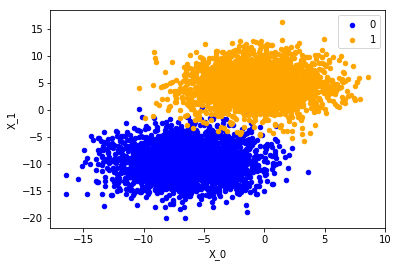

In [245]:
###### This Code plots only for Classification purposes
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))  #Creating dataframe with x,y,label as column names
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')  #Grouping the label such that, both features will be plotted against label
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()

In [246]:
df.shape

(5000, 3)

In [247]:
df.head(4)

,x,y,label
0,1.070113,-5.749949,0
1,-3.846441,-8.086116,0
2,0.301123,6.144076,1
3,-4.212843,-9.472289,0


In [248]:
### Making target and features variables
target = df['label'];
features = df.drop(['label'],axis= 1)

In [249]:
print('shape of target :', target.shape)
print('shape of features :',features.shape)

shape of target : (5000,)
shape of features : (5000, 2)


In [251]:
target = np.array(target)
target = target.reshape(1,5000)

In [252]:
print('shape of target :', target.shape)
print('shape of features :',features.shape)

shape of target : (1, 5000)
shape of features : (5000, 2)


# Usually Feature scaling/normalising is very important but here in this distribution values are already so small, so normalising wont be necessary

In [253]:
### This is called sigmoid function like in linear regression we had a line, here we have a sigmoid for hypothesis
def sigmoid(m,x,c):
    return 1/((1+np.exp(-np.dot(m,x.T)+c)))
### This is error function which consists of means of all the errors
def cost(m,x,c,y):
    y_pred = sigmoid(m,x,c)
    ### In the below formula, when y = 1, we get value of log(y_pred) and that gives us how much error the y_pred is carrying 
    ### when compared to y_actual, similarly for log(1-y_pred) when y = 0.
    ### when y_pred becomes equal to '1', then log becomes '0', that means error becomes '0'.
    error = -(y*np.log(y_pred)+0.005) - ((1-y)*(np.log(1-y_pred)+0.005))
    return np.mean(error)
def grad_m(m,x,c,y):
    y_pred = sigmoid(m,x,c)
    ### This is to minimise the 'm' value and to get the optimal 'm' value
    grad = np.mean((y_pred - y)*x.T, axis=1)
    grad = np.array(grad)
    grad = grad.reshape(1,2)
    return grad
def grad_c(m,x,c,y):
    y_pred = sigmoid(m,x,c)
    ### This is to minimise the 'c' value and to get the optimal 'c' value
    return np.mean(y_pred - y)
def accuracy(m,x,c,y):
    y_pred=sigmoid(m,x,c)
    ### As y_pred in our case can be any value between 0 to 1
    ### We're equating them when y_pred >= 0.5 to '1' and y_pred < 0.5 to '0'
    y_pred[y_pred>=0.5]=1   
    y_pred[y_pred<0.5]=0
    correct=len(y_pred[y_pred==y])
    return correct/len(y.T)*100


# ''''Note : As the instances increases, the learning loop efficiency decreases""" means, the cost may fall into inf or NaN.
# To not allow that to happen, we need to take care of log(y_pred) and log(1-y_pred) where y_pred to not fall into ""0"".
# To avoid that to happen, we need to add y_pred with some scalar value such as 0.009 or 0.0005

---------------------------------------Iteration : 1099---------------------------------------
Error : nan
m : [[-1.32951959  5.96079233]]
c : 25.19212948994027
Accuracy : 77.0


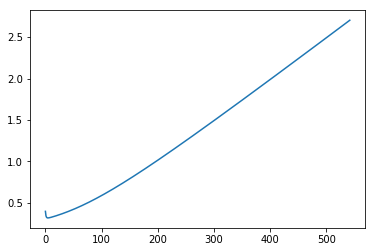

In [226]:
########################################## Caution : ########################################################
####################################### TRAINING ZONE ########################################################
m = np.random.randn(1,2)
c = random.random()
lr = 0.1
errors = []
for i in range(1100):
    m = m - lr * grad_m(m,features,c,target)
    c = c - lr * grad_c(m,features,c,target)
    errors.append(cost(m,features,c,target))
    clear_output(True)
    print('---------------------------------------Iteration : %d---------------------------------------'%i)
    print('Error :',errors[i])
    print('m :',m)
    print('c :',c)
    print('Accuracy :',accuracy(m,features,c,target))
plt.plot(errors)
plt.show()    
#####################   THIS IS TO SHOW HOW ERROR WILL BECOME NAN / INF  #################

---------------------------------------Iteration : 1099---------------------------------------
Error : 0.36515789540127364
m : [[-0.00510904  0.43560201]]
c : 0.9872389747443596
Accuracy : 83.5


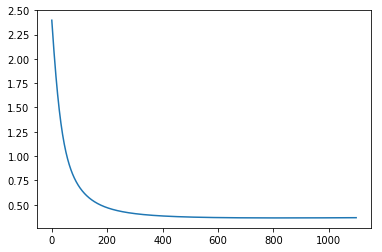

In [228]:
m = np.random.randn(1,2)
c = random.random()
lr = 0.001
errors = []
for i in range(1100):
    m = m - lr * grad_m(m,features,c,target)
    c = c - lr * grad_c(m,features,c,target)
    errors.append(cost(m,features,c,target))
    clear_output(True)
    print('---------------------------------------Iteration : %d---------------------------------------'%i)
    print('Error :',errors[i])
    print('m :',m)
    print('c :',c)
    print('Accuracy :',accuracy(m,features,c,target))
plt.plot(errors)
plt.show()    

In [254]:
features.T.iloc[0,:].shape

(5000,)

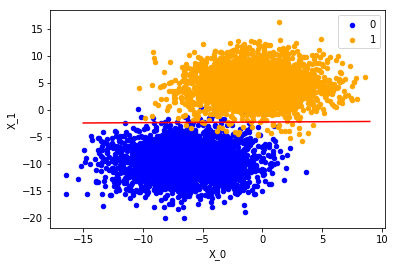

In [241]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y,color = 'red') 
def my_formula(x):
    return (-c-m[0][0]*x)/m[0][1]       ##### Either of both lines will work and one of them will be efficient
    #return -((m[0][0]*x+m[0][1]*x) + c)
from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
graph(my_formula, range(-15,10))
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()